# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/NathanAsh_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

620


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
params = {
    'city': cities,
    'key': weather_api_key
}


city_df = pd.DataFrame({
    "City" :cities
})


city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""
dinde =[]


set = 1
count = 1

for index,row in city_df.iterrows():
    url = f"http://api.openweathermap.org/data/2.5/weather?q={row[0]}&appid={params['key']}"
    check = requests.get(url)
    try:
        city_df.loc[index, "Lat"] = check.json()['coord']['lat']
        city_df.loc[index,"Lng"] = check.json()['coord']['lon']
        city_df.loc[index,"Max Temp"] = check.json()['main']['temp_max']
        city_df.loc[index,"Humidity"] = check.json()['main']['humidity']
        city_df.loc[index,"Cloudiness"] = check.json()['clouds']['all']
        city_df.loc[index,"Wind Speed"] = check.json()['wind']['speed']
        city_df.loc[index,"Country"] = check.json()['sys']['country']
        city_df.loc[index,"Date"] = check.json()['dt']
        city_df.loc[index,'Country'] = check.json()['sys']['country']
        print(f'Processing Record {count} of Set {set} | {row[0]}')
        count += 1
        if count == 50:
            count = 0
            set += 1
    except:
        print(f'Failed: missing result | {row[0]}')
        dinde.append(index)
#         city_df.drop(city_df.index[index])
###Deleted rows here but they arent going away


for i in range(len(dinde)):
    city_df.drop(city_df.index[i],inplace = True)

city_df.head()
  



Processing Record 1 of Set 1 | kutum
Processing Record 2 of Set 1 | marsa matruh
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | kalmunai
Processing Record 6 of Set 1 | lamu
Failed: missing result | kamenskoye
Processing Record 7 of Set 1 | vostok
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | lagos
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | maldonado
Processing Record 16 of Set 1 | puerto ayora
Failed: missing result | illoqqortoormiut
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | digha
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | balclutha
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | albany
Processi

Processing Record 35 of Set 4 | hermanus
Processing Record 36 of Set 4 | bandarbeyla
Processing Record 37 of Set 4 | santa cruz
Processing Record 38 of Set 4 | general roca
Processing Record 39 of Set 4 | alice springs
Processing Record 40 of Set 4 | makakilo city
Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | haicheng
Processing Record 43 of Set 4 | hobart
Processing Record 44 of Set 4 | kiama
Processing Record 45 of Set 4 | lensk
Failed: missing result | sorvag
Processing Record 46 of Set 4 | hualmay
Processing Record 47 of Set 4 | southbridge
Processing Record 48 of Set 4 | mugumu
Processing Record 49 of Set 4 | banikoara
Processing Record 0 of Set 5 | kathu
Processing Record 1 of Set 5 | takoradi
Processing Record 2 of Set 5 | lasa
Processing Record 3 of Set 5 | ous
Processing Record 4 of Set 5 | mecca
Processing Record 5 of Set 5 | newport
Processing Record 6 of Set 5 | mayo
Processing Record 7 of Set 5 | ambilobe
Failed: missing result | umzimvubu
Failed:

Processing Record 19 of Set 8 | atbasar
Processing Record 20 of Set 8 | yinchuan
Processing Record 21 of Set 8 | oranjemund
Processing Record 22 of Set 8 | viedma
Processing Record 23 of Set 8 | coos bay
Processing Record 24 of Set 8 | kaeo
Processing Record 25 of Set 8 | wabag
Processing Record 26 of Set 8 | ulaanbaatar
Processing Record 27 of Set 8 | duobao
Processing Record 28 of Set 8 | salinopolis
Processing Record 29 of Set 8 | tombouctou
Processing Record 30 of Set 8 | san cristobal
Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | koshurnikovo
Processing Record 33 of Set 8 | bima
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | zhezkazgan
Processing Record 36 of Set 8 | buritizeiro
Processing Record 37 of Set 8 | dakoro
Processing Record 38 of Set 8 | simuay
Processing Record 39 of Set 8 | rundu
Processing Record 40 of Set 8 | khambhat
Processing Record 41 of Set 8 | aksarka
Processing Record 42 of Set 8 | mandera
Processin

Processing Record 5 of Set 12 | el sauce
Processing Record 6 of Set 12 | namibe
Processing Record 7 of Set 12 | tlapehuala
Processing Record 8 of Set 12 | jacmel
Processing Record 9 of Set 12 | palmer
Processing Record 10 of Set 12 | atar
Failed: missing result | ye
Processing Record 11 of Set 12 | boguchany
Processing Record 12 of Set 12 | macedo de cavaleiros
Failed: missing result | satitoa
Processing Record 13 of Set 12 | sao luiz gonzaga
Processing Record 14 of Set 12 | namatanai
Processing Record 15 of Set 12 | yenagoa
Processing Record 16 of Set 12 | koslan
Processing Record 17 of Set 12 | muros
Failed: missing result | buariki


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,marsa matruh,31.35,27.25,301.15,58,0,5.1,EG,1597510261
3,mataura,-46.19,168.86,278.71,94,84,0.95,NZ,1597510262
5,lamu,-2.27,40.9,297.53,74,82,7.95,KE,1597510262
7,vostok,46.49,135.88,286.18,100,2,2.5,RU,1597510263
9,lagos,6.58,3.75,301.15,74,75,4.6,NG,1597509854


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#display number of cities removed
print(f'{len(dinde)} cities were not found and removed')  
#display count
city_df.count()

53 cities were not found and removed


City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
#show preview of data to check DataFrame
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,marsa matruh,31.35,27.25,301.15,58,0,5.1,EG,1597510261
3,mataura,-46.19,168.86,278.71,94,84,0.95,NZ,1597510262
5,lamu,-2.27,40.9,297.53,74,82,7.95,KE,1597510262
7,vostok,46.49,135.88,286.18,100,2,2.5,RU,1597510263
9,lagos,6.58,3.75,301.15,74,75,4.6,NG,1597509854


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:

tothum = len(city_df)
city_df['Humidity']  = pd.to_numeric(city_df['Humidity'])
# for index,row in city_df.iterrows():
under = city_df['Humidity'].gt(100).value_counts()

print(f'There are {tothum} cities and {under[0]} of those cities \nhave humidity recording under 100% humidity')

if tothum == under[0]:
    print(f'There are no cities with humidity over 100%')


There are 567 cities and 567 of those cities 
have humidity recording under 100% humidity
There are no cities with humidity over 100%


In [7]:
#  Get the indices of cities that have humidity over 100%.

if tothum == under[0]:
    print(f'There are no cities with humidity over 100%')
    index = city_df[city_df['Humidity'].gt(100)].index
else:
    print(f'There are no cities with humidity over 100%')
    index = city_df[city_df['Humidity'].gt(100)].index[0]
index


There are no cities with humidity over 100%


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clcity = city_df.loc[city_df['Humidity'].gt(100)==False]
clcity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,marsa matruh,31.35,27.25,301.15,58.0,0,5.1,EG,1597510261
3,mataura,-46.19,168.86,278.71,94.0,84,0.95,NZ,1597510262
5,lamu,-2.27,40.9,297.53,74.0,82,7.95,KE,1597510262
7,vostok,46.49,135.88,286.18,100.0,2,2.5,RU,1597510263
9,lagos,6.58,3.75,301.15,74.0,75,4.6,NG,1597509854
...,...,...,...,...,...,...,...,...,...
615,namatanai,-3.67,152.43,298.87,81.0,41,2.12,PG,1597510411
616,yenagoa,4.92,6.26,301.73,61.0,30,4.35,NG,1597510411
617,koslan,63.46,48.9,283.89,66.0,54,2.18,RU,1597510411
618,muros,42.78,-9.06,294.26,75.0,1,7.15,ES,1597510411


In [9]:
# Extract relevant fields from the data frame
#convert Kelvin to F
rcity = clcity[['City','Lat','Lng',"Max Temp",'Humidity', 'Cloudiness','Wind Speed','Country' ]]
rcity = rcity.dropna(how = 'any')
rcity = pd.DataFrame(rcity)
rcity['Max Temp']  = pd.to_numeric(rcity['Max Temp'],errors = 'coerce')
rcity['Max Temp'] = (rcity['Max Temp']) *9/5 -459.67
rcity = rcity.rename(columns = {
    'Lat': "Latitude",
    'Lng': "Longitude",
    "Max Temp": 'Max Tempurature (F)',
    "Humidity": 'Humidity (%)',
    'Cloudiness' : 'Cloudiness (%)',
    'Wind Speed': 'Wind Speed (mph)'
})

# Export the City_Data into a csv
rcity.to_csv(output_data_file)
rcity

,City,Latitude,Longitude,Max Tempurature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country
1,marsa matruh,31.35,27.25,82.400,58.0,0,5.1,EG
3,mataura,-46.19,168.86,42.008,94.0,84,0.95,NZ
5,lamu,-2.27,40.9,75.884,74.0,82,7.95,KE
7,vostok,46.49,135.88,55.454,100.0,2,2.5,RU
9,lagos,6.58,3.75,82.400,74.0,75,4.6,NG
...,...,...,...,...,...,...,...,...
614,sao luiz gonzaga,-28.41,-54.96,64.760,74.0,54,2.05,BR
615,namatanai,-3.67,152.43,78.296,81.0,41,2.12,PG
616,yenagoa,4.92,6.26,83.444,61.0,30,4.35,NG
617,koslan,63.46,48.9,51.332,66.0,54,2.18,RU


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

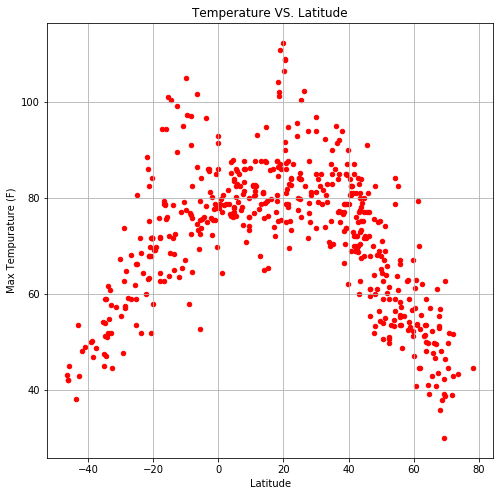

In [10]:
temlat = rcity[['Max Tempurature (F)','Latitude']]

temlat.plot(kind='scatter',x = 'Latitude',y = 'Max Tempurature (F)',
            color = 'red', grid = True,figsize= (8,8))
plt.title(f"Temperature VS. Latitude")
plt.show()

## Latitude vs. Humidity Plot

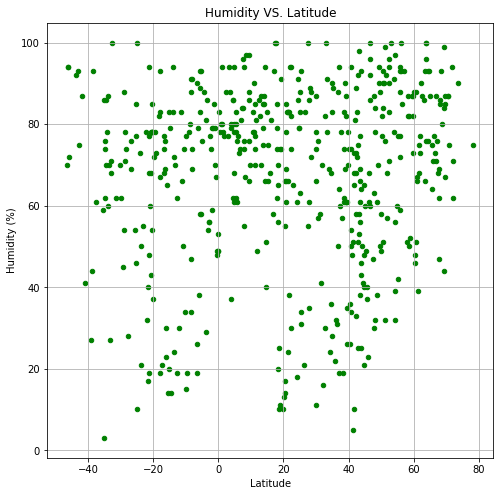

In [11]:
humlat = rcity[['Humidity (%)','Latitude']]

humlat.plot(kind='scatter',x = 'Latitude',y = 'Humidity (%)',
            color = 'green', grid = True,figsize= (8,8))
plt.title("Humidity VS. Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

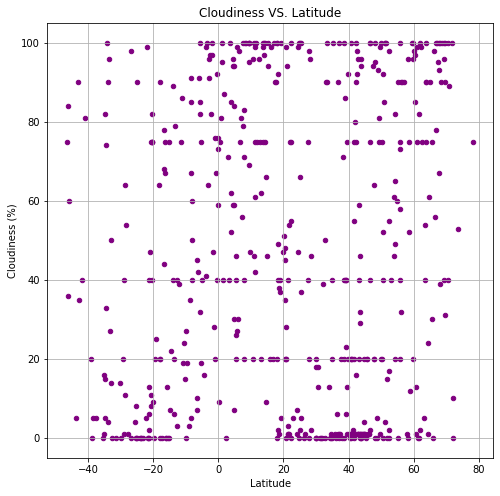

In [12]:
clolat = rcity[['Cloudiness (%)','Latitude']]

clolat.plot(kind='scatter',x = 'Latitude',y = 'Cloudiness (%)',
            color = 'purple', grid = True,figsize= (8,8))
plt.title("Cloudiness VS. Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

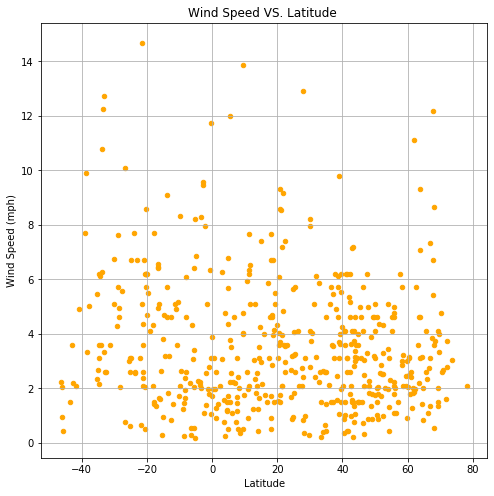

In [13]:
clolat = rcity[['Wind Speed (mph)','Latitude']]

clolat.plot(kind='scatter',x = 'Latitude',y = 'Wind Speed (mph)',
            color = 'orange', grid = True,figsize= (8,8))
plt.title("Wind Speed VS. Latitude ")
plt.show()

## Linear Regression

                     City Latitude Longitude  Max Tempurature (F)  \
1            marsa matruh    31.35     27.25               82.400   
7                  vostok    46.49    135.88               55.454   
9                   lagos     6.58      3.75               82.400   
11                  lagoa    39.05    -27.98               73.724   
19                  digha    21.68     87.55               82.958   
..                    ...      ...       ...                  ...   
611             boguchany    58.38     97.45               54.248   
612  macedo de cavaleiros    41.54     -6.96               69.998   
616               yenagoa     4.92      6.26               83.444   
617                koslan    63.46      48.9               51.332   
618                 muros    42.78     -9.06               69.998   

     Humidity (%) Cloudiness (%) Wind Speed (mph) Country  
1            58.0              0              5.1      EG  
7           100.0              2              2.5  

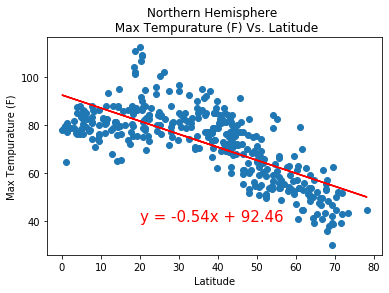

                 City Latitude Longitude  Max Tempurature (F)  Humidity (%)  \
3             mataura   -46.19    168.86               42.008          94.0   
5                lamu    -2.27      40.9               75.884          74.0   
13              vaini    -21.2    -175.2               68.000          77.0   
15          maldonado   -34.67    -54.92               53.996          62.0   
21              airai    -8.93    125.41               57.992          78.0   
..                ...      ...       ...                  ...           ...   
586     alta floresta    -9.88    -56.09              105.044          15.0   
603              auki    -8.77     160.7               76.892          80.0   
605            namibe    -15.2     12.15               63.662          83.0   
614  sao luiz gonzaga   -28.41    -54.96               64.760          74.0   
615         namatanai    -3.67    152.43               78.296          81.0   

    Cloudiness (%) Wind Speed (mph) Country  
3    

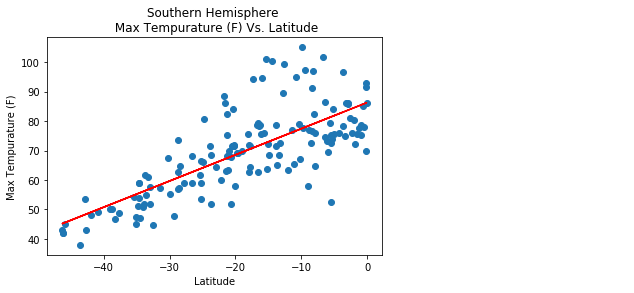

                     City Latitude Longitude  Max Tempurature (F)  \
1            marsa matruh    31.35     27.25               82.400   
7                  vostok    46.49    135.88               55.454   
9                   lagos     6.58      3.75               82.400   
11                  lagoa    39.05    -27.98               73.724   
19                  digha    21.68     87.55               82.958   
..                    ...      ...       ...                  ...   
611             boguchany    58.38     97.45               54.248   
612  macedo de cavaleiros    41.54     -6.96               69.998   
616               yenagoa     4.92      6.26               83.444   
617                koslan    63.46      48.9               51.332   
618                 muros    42.78     -9.06               69.998   

     Humidity (%) Cloudiness (%) Wind Speed (mph) Country  
1            58.0              0              5.1      EG  
7           100.0              2              2.5  

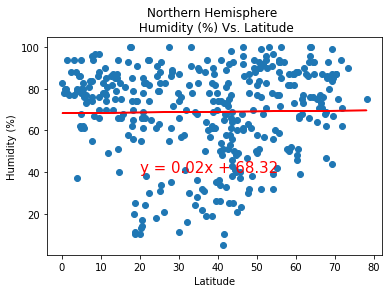

                 City Latitude Longitude  Max Tempurature (F)  Humidity (%)  \
3             mataura   -46.19    168.86               42.008          94.0   
5                lamu    -2.27      40.9               75.884          74.0   
13              vaini    -21.2    -175.2               68.000          77.0   
15          maldonado   -34.67    -54.92               53.996          62.0   
21              airai    -8.93    125.41               57.992          78.0   
..                ...      ...       ...                  ...           ...   
586     alta floresta    -9.88    -56.09              105.044          15.0   
603              auki    -8.77     160.7               76.892          80.0   
605            namibe    -15.2     12.15               63.662          83.0   
614  sao luiz gonzaga   -28.41    -54.96               64.760          74.0   
615         namatanai    -3.67    152.43               78.296          81.0   

    Cloudiness (%) Wind Speed (mph) Country  
3    

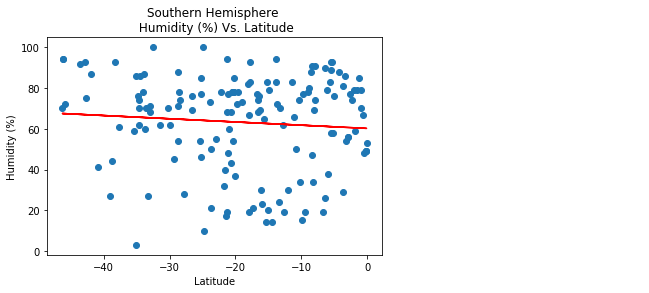

                     City Latitude Longitude  Max Tempurature (F)  \
1            marsa matruh    31.35     27.25               82.400   
7                  vostok    46.49    135.88               55.454   
9                   lagos     6.58      3.75               82.400   
11                  lagoa    39.05    -27.98               73.724   
19                  digha    21.68     87.55               82.958   
..                    ...      ...       ...                  ...   
611             boguchany    58.38     97.45               54.248   
612  macedo de cavaleiros    41.54     -6.96               69.998   
616               yenagoa     4.92      6.26               83.444   
617                koslan    63.46      48.9               51.332   
618                 muros    42.78     -9.06               69.998   

     Humidity (%) Cloudiness (%) Wind Speed (mph) Country  
1            58.0              0              5.1      EG  
7           100.0              2              2.5  

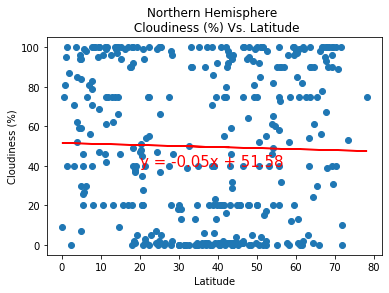

                 City Latitude Longitude  Max Tempurature (F)  Humidity (%)  \
3             mataura   -46.19    168.86               42.008          94.0   
5                lamu    -2.27      40.9               75.884          74.0   
13              vaini    -21.2    -175.2               68.000          77.0   
15          maldonado   -34.67    -54.92               53.996          62.0   
21              airai    -8.93    125.41               57.992          78.0   
..                ...      ...       ...                  ...           ...   
586     alta floresta    -9.88    -56.09              105.044          15.0   
603              auki    -8.77     160.7               76.892          80.0   
605            namibe    -15.2     12.15               63.662          83.0   
614  sao luiz gonzaga   -28.41    -54.96               64.760          74.0   
615         namatanai    -3.67    152.43               78.296          81.0   

    Cloudiness (%) Wind Speed (mph) Country  
3    

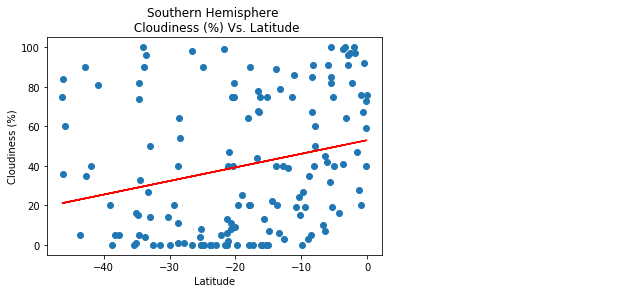

                     City Latitude Longitude  Max Tempurature (F)  \
1            marsa matruh    31.35     27.25               82.400   
7                  vostok    46.49    135.88               55.454   
9                   lagos     6.58      3.75               82.400   
11                  lagoa    39.05    -27.98               73.724   
19                  digha    21.68     87.55               82.958   
..                    ...      ...       ...                  ...   
611             boguchany    58.38     97.45               54.248   
612  macedo de cavaleiros    41.54     -6.96               69.998   
616               yenagoa     4.92      6.26               83.444   
617                koslan    63.46      48.9               51.332   
618                 muros    42.78     -9.06               69.998   

     Humidity (%) Cloudiness (%) Wind Speed (mph) Country  
1            58.0              0              5.1      EG  
7           100.0              2              2.5  

IndexError: index out of bounds

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
Nlat = rcity.copy()



count = 0
items = ['Max Tempurature (F)','Max Tempurature (F)','Humidity (%)','Humidity (%)',
        'Cloudiness (%)','Cloudiness (%)','Wind Speed (mph)','Wind Speed (mph)']
corin = 0
for i in items:
    Nlat = rcity.copy()
    if (count %2) ==0:
        Nlat = Nlat.loc[temlat['Latitude'].gt(0)==True]
        area = 'North'
        corin += 1
    else:
        Nlat = Nlat.loc[temlat['Latitude'].gt(0)==False]
        area = 'South'
        
    count += 1   
    print(Nlat)
    
    Nlat = pd.DataFrame(Nlat)
    Nlat[i]  = pd.to_numeric(Nlat[i])
    Nlat = pd.DataFrame(Nlat)
    
    Nlat
    Nlat['Latitude']  = pd.to_numeric(Nlat['Latitude'])
    Corlat = Nlat.corr()
    print(Corlat)
    corlat = round(Corlat['Latitude'][corin],3)
    print(f'The Corr coefficient is {corlat}')
    
      
    x_values = Nlat['Latitude']
    y_values = Nlat[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,40),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(i)
    plt.title(f'{area}ern Hemisphere \n {i} Vs. Latitude')
    plt.show()

In [17]:
Nlat

,City,Latitude,Longitude,Max Tempurature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country
1,marsa matruh,31.35,27.25,82.400,58.0,0,5.1,EG
3,mataura,-46.19,168.86,42.008,94.0,84,0.95,NZ
5,lamu,-2.27,40.9,75.884,74.0,82,7.95,KE
7,vostok,46.49,135.88,55.454,100.0,2,2.5,RU
9,lagos,6.58,3.75,82.400,74.0,75,4.6,NG
...,...,...,...,...,...,...,...,...
614,sao luiz gonzaga,-28.41,-54.96,64.760,74.0,54,2.05,BR
615,namatanai,-3.67,152.43,78.296,81.0,41,2.12,PG
616,yenagoa,4.92,6.26,83.444,61.0,30,4.35,NG
617,koslan,63.46,48.9,51.332,66.0,54,2.18,RU


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:

# Nlat = temlat.loc[temlat['Latitude'].gt(0)==True]
# Nlat = pd.DataFrame(Nlat)
# Nlat['Latitude']  = pd.to_numeric(Nlat['Latitude'])
# Nlat = pd.DataFrame(Nlat)
# Nlat['Max Tempurature (F)']  = pd.to_numeric(Nlat['Max Tempurature (F)'])
# Nlat = pd.DataFrame(Nlat)

# Corlat = Nlat.corr()
# corlat = round(Corlat['Latitude'][0],3)
# print(f'The Corr coefficient is {corlat}')
      
# x_values = Nlat['Latitude']
# y_values = Nlat['Max Tempurature (F)']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,40),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Tempurature (F)')
# plt.title('Max Tempurature Vs. Latitude')
# plt.show()

####  Northern & Southern Hemisphere - Max Temp vs. Latitude Linear Regression

    The max tempuratures decrease as you climb up towards the top/bottom of the Northern or Southern Hemisphere. The corrilation coeffieicnt is nearing -.8 or .8 which is a strong number, so I would say that the line on the scatter chart has a high probability of corrilation to the truth

####  Northern & Southern Hemisphere -  Humidity vs. Latitude Linear Regression

For Humidity the corrilation coeffieicnt is quite low for both the Northern and Southern graphs. I would say there is little connection to Humidity 

In [ ]:
# After each pair of plots explain what the linear 
# regression is modeling such as any relationships 
# you notice and any other analysis you may have.